## Задача 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
np.seterr(divide='ignore'); #установить способ обработки ошибок с плавающей запятой, игнорировать: не предпринимать никаких действий при возникновении исключения.
plt.rcParams["figure.figsize"] = (5,5) # figure size in inches
plt.rcParams['figure.dpi'] = 100 # figure dots per inch

In [3]:
a = 3
U0 = 0.001
E0 = -0.95
precision=10e-9

$f(\zeta) = \cot \sqrt{2a^2U_0 * (1-\zeta )} - \sqrt{\frac{1}{\zeta}-1}=0$

In [4]:
# original fucntion
# def f(E):
#     return (1/np.tan(np.sqrt(2 * a * a * U0 * (1 + E/U0)))) - np.sqrt((-U0/E) - 1) 
def f(E):
    return np.cos(np.sqrt(2 * a * a * U0 * (1 + E/U0)))**2 - 1 - E/U0

In [5]:
# derivative of original function
# def df(E):
#     return - (a ** 2) / ((np.sin(np.sqrt(2 * a * a * U0 * (1 + E/U0))) ** 2) * np.sqrt(2 * a * a * U0 * (1 + E/U0))) - (U0/2)/(E**2*((-U0/E) - 1))
def df(E):
    return 2 * np.cos(np.sqrt(2 * a * a * U0 * (1 + E/U0))) * (-1)*np.sin(np.sqrt(2 * a * a * U0 * (1 + E/U0))) * (2 * a * a * U0 * (1 + E/U0))**(-1/2)*a*a - 1/U0

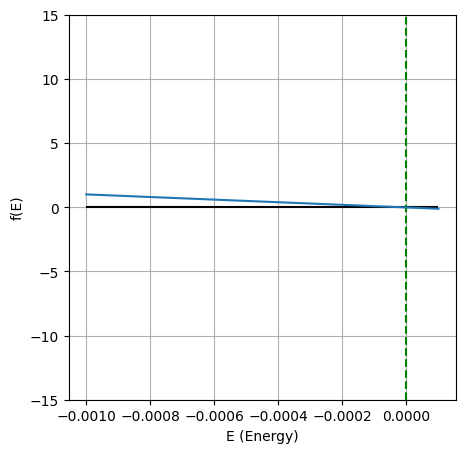

In [17]:
dom = np.linspace(-U0, 0.0001, 10000) #numpy.linspace (start, end, num = num_points)
val = f(dom)
plt.xlabel("E (Energy)")
plt.ylabel("f(E)")
plt.ylim([-15, 15])
plt.hlines(0, xmin=-U0, xmax=0.0001, colors='k') #горизонтальные линии на каждом y от xmin до xmax
plt.vlines(min(0, np.pi**2/(8*a*a)-U0), ymin=-15, ymax=15, colors='green', linestyles='--', label='Estimation to original rule') #вертикальные линии в каждом x от ymin до ymax
plt.plot(dom, val)
plt.grid()
#plt.legend(loc='lower left')
plt.show()

# Dichotomy

In [7]:
def dyhotomy(a, b, counterDichotomy=0, eps=10e-3):
    while abs(f(b)-f(a)) > eps:
        counterDichotomy += 1
        mid = (a+b) / 2
        if f(mid) == 0 or abs(f(mid)) < eps:
            print('Корень по методу дихотомии находится в точке x = {}'.format(mid))
            print("Deep of recursion in Dichotomy: {}".format(counterDichotomy))
            break
        elif f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
    else:
        print('Корень не найден')
    return mid

*($-U_0$, $\frac{\pi^2}{8a^2} - U_0$)*

In [8]:
dichotomyRoot = dyhotomy(-U0, 0.001)
print('f({}) = {}'.format(dichotomyRoot, f(dichotomyRoot)))

Корень по методу дихотомии находится в точке x = -1.5625e-05
Deep of recursion in Dichotomy: 7
f(-1.5625e-05) = -0.001989345559002209


# Iteration Method

In [9]:
#l = 1 / df(np.pi**2/(8*a*a)-U0)
l = 1 / df(0.001)

def iterationMethod(x, q=-2.8, counterIter=0, eps=precision):
    x_ = - l * f(x)
    err = np.abs(q - x)
    if err <= eps:
        print("Deep of recursion in FPI: {}".format(counterIter))
        return x
    counterIter += 1
    return iterationMethod(x + x_, x, counterIter)

In [10]:
IterRoot = iterationMethod(0.001)
print(f'Корень по методу простых итераций находится в точке x = {IterRoot}')
print('f({}) = {}'.format(IterRoot, f(IterRoot)))
# IterRoot = iterationMethod(-1.6)
# print(f'Корень по методу простых итераций находится в точке x = {IterRoot}')
# print('f({}) = {}'.format(IterRoot, f(IterRoot)))
# IterRoot = iterationMethod(-0.1)
# print(f'Корень по методу простых итераций находится в точке x = {IterRoot}')
# print('f({}) = {}'.format(IterRoot, f(IterRoot)))

Deep of recursion in FPI: 3
Корень по методу простых итераций находится в точке x = -1.7579576891949808e-05
f(-1.7579576891949808e-05) = 5.047216117270992e-12


# Newton's Method

In [11]:
def Newton(x, q=IterRoot, counterNewton=0, eps=precision):
    x_ = f(x) / df(x)
    err = np.abs(q - x)
    if err < eps:
        print("Deep of recursion in NM: {}".format(counterNewton))
        return x
    counterNewton += 1
    return Newton(x - x_, x, counterNewton)

In [12]:
NewtRoot = Newton(0.001)
print('Корень по методу Ньютона находится в точке x = {}'.format(NewtRoot))
print('f({}) = {}'.format(NewtRoot, f(NewtRoot)))
# NewtRoot = Newton(-1.6)
# print('Корень по методу Ньютона находится в точке x = {}'.format(NewtRoot))
# print('f({}) = {}'.format(NewtRoot, f(NewtRoot)))
# NewtRoot = Newton(-0.1)
# print('Корень по методу Ньютона находится в точке x = {}'.format(NewtRoot))
# print('f({}) = {}'.format(NewtRoot, f(NewtRoot)))

Deep of recursion in NM: 3
Корень по методу Ньютона находится в точке x = -1.7579576886990755e-05
f(-1.7579576886990755e-05) = -1.0061396160665481e-16
